In [1]:
import pandas as pd

df = pd.read_csv("../riskyfood_2023-07-19T113234_405932.csv")

In [2]:
df.head()

,RunId,iteration,Step,n,prob_notcontaminated,contaminated,average_risk_level,min_risk_level,max_risk_level,num_agents,AgentID,risk_level,payoff
0,0,0,0,10,0.909222,1,0.547708,0.01239,0.961562,10,NaN,NaN,NaN
1,0,0,1,10,0.981479,0,0.525926,0.01239,0.961562,19,0.0,0.818438,2.0
2,0,0,1,10,0.981479,0,0.525926,0.01239,0.961562,19,1.0,0.961562,1.0
3,0,0,1,10,0.981479,0,0.525926,0.01239,0.961562,19,2.0,0.095935,2.0
4,0,0,1,10,0.981479,0,0.525926,0.01239,0.961562,19,3.0,0.012390,2.0


In [3]:
# we couldn't do 100 steps for these because of the population explosion problem
# how many steps did we end up with?
df.Step.value_counts()


Step
22    18267295
21     8169007
20     5594441
19     2640823
18     1716515
17      796653
16      441027
15      291215
14      219864
13      116250
12       51708
11       23970
10       14406
9         6748
8         3604
7         1687
6         1135
5          563
4          299
3          153
2           84
1           50
0            5
Name: count, dtype: int64

In [4]:
# get data from the last step of each run
last_step = df[df.Step == 22]
last_step

,RunId,iteration,Step,n,prob_notcontaminated,contaminated,average_risk_level,min_risk_level,max_risk_level,num_agents,AgentID,risk_level,payoff
9857152,0,0,22,10,0.305690,0,0.463917,0.012390,0.961562,12734950,0.0,0.818438,1.0
9857153,0,0,22,10,0.305690,0,0.463917,0.012390,0.961562,12734950,1.0,0.961562,1.0
9857154,0,0,22,10,0.305690,0,0.463917,0.012390,0.961562,12734950,2.0,0.095935,2.0
9857155,0,0,22,10,0.305690,0,0.463917,0.012390,0.961562,12734950,3.0,0.012390,2.0
9857156,0,0,22,10,0.305690,0,0.463917,0.012390,0.961562,12734950,4.0,0.735042,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38357497,4,4,22,10,0.614945,0,0.347472,0.240855,0.860197,3282480,5402634.0,0.240855,2.0
38357498,4,4,22,10,0.614945,0,0.347472,0.240855,0.860197,3282480,5402636.0,0.240855,2.0
38357499,4,4,22,10,0.614945,0,0.347472,0.240855,0.860197,3282480,5402638.0,0.240855,2.0
38357500,4,4,22,10,0.614945,0,0.347472,0.240855,0.860197,3282480,5402640.0,0.240855,2.0


## overall risk distribution at end of simulations

<Axes: >

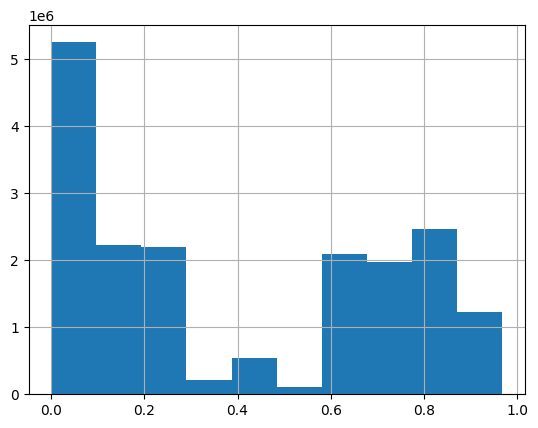

In [5]:
# overall ending risk distribution across all runs
last_step.risk_level.hist()

<Axes: >

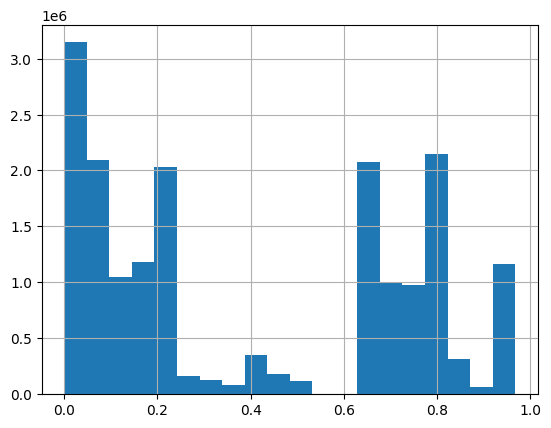

In [6]:
# does it look any different if we change the number of bins?
last_step.risk_level.hist(bins=20)

In [7]:
# how many runs did we have?
# only 5, no variation in parameters
last_step.RunId.unique()

array([0, 1, 2, 3, 4])

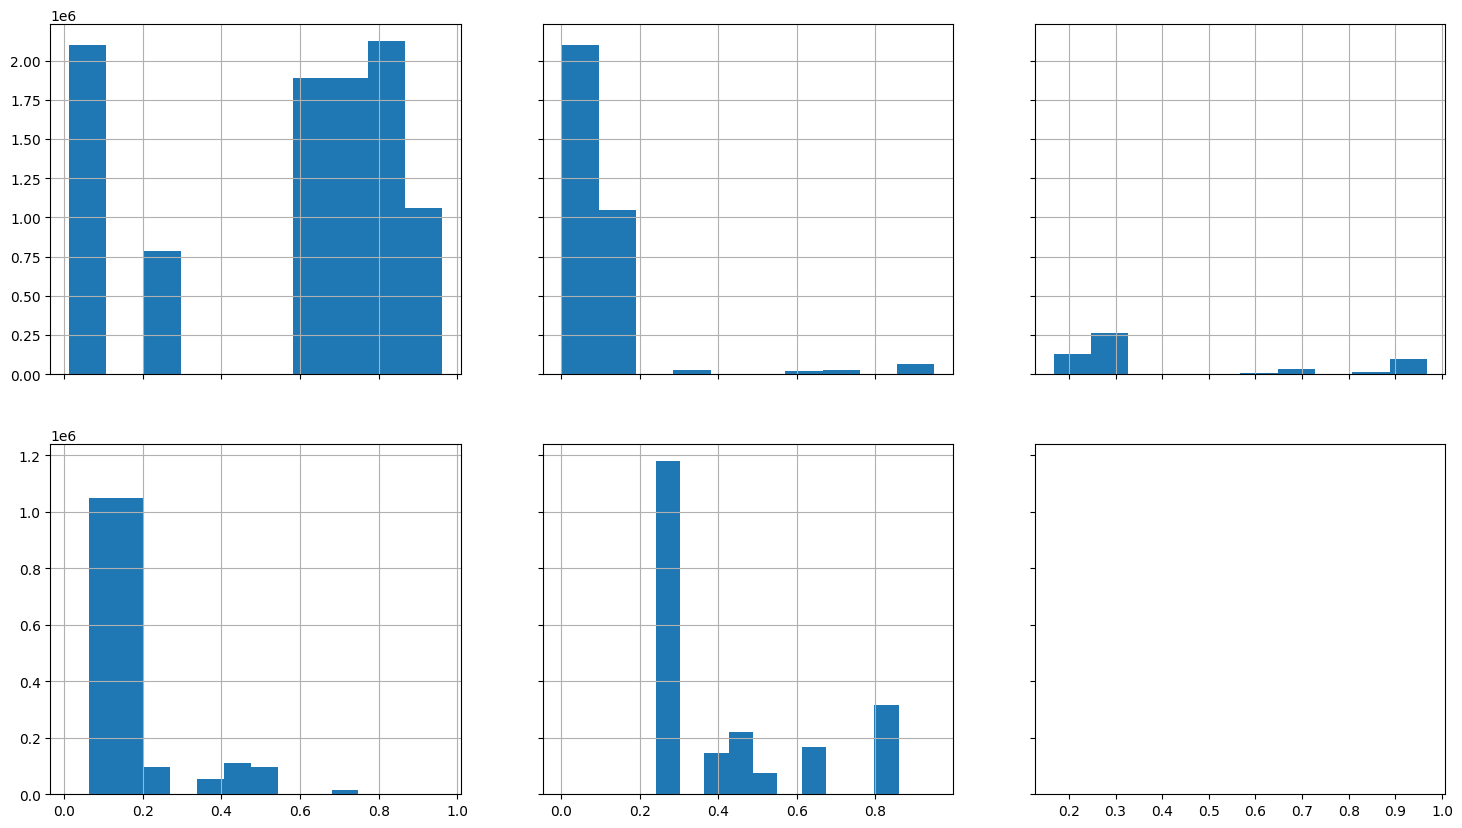

In [17]:
# plot a histogram of ending risk levels for each run
# combine into a grid of plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, nrows=2, sharex='col', sharey='row', figsize=(18,10))

for run in last_step.RunId.unique():
    run_last_step = last_step[last_step.RunId == run]
    plot_location = ax[int(run/3), int(run % 3)]
    run_last_step.risk_level.hist(ax=plot_location, bins=10)